# Linear Regression 🏹

### After this session you should be able to 
- explain in your own words what Linear Regression does and be able to apply it to your own datasets
- benchmark your Linear Regression models to so-called "naïve" models
- understand and use the Scikit Learn framework for applying ML workflow (prep data, train a model, evaluate model, make predictions) - by using LinearRegression()
- interpret model metrics (e.g. R^2)
- explain in your own words what the pros and cons of Linear Regression are

* Regression: predicting a continuous value (**model assumption**), not a class
* Linear: fitting a line through our data!  

## Ingredients for linear regression model

The equation describing the **"true" linear relation between independent and dependent variables**:

$$
y = w_0 + w_1x + \epsilon
$$


* $w_0$ - intercept, also referred to as "bias" (effectively: the mean of the target variable y for each value of x. Interesting for defining baseline ("naïve") predictor
* $w_i$ - "slope"
* $x_i$ - features, independent variables
* $\epsilon$ are randomly distributed noise values. 

The **model equation**: a function we fit to the data    

$$\hat y = w_0 + w_1 x $$

the generalized model
$$\hat y = w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n$$
* $\hat y$ - dependent variable
* $x_i$ - features, independent variables


with 2+ features we are fitting a **hyperplane**.


shorthand linear algebraic notation with a coefficient vector $w$:
    
$$\hat y = w_0 + X \cdot w^T$$

To simulate data we have to choose some true values for $w_0$ and $w_1$. In order to do that, we need a "loss function".

## The loss function
* evaluates how our model is doing
$$ MSE = \frac{1}{N}\sum(y_{pred_i}-y_{true_i})^2$$ 

### How to fit a Linear Model? Two alternatives, of which we will discuss one 🪅 tomorrow!

## Implement the baseline ("naïve"🤓) model of the LinReg:

### 1. Using aggregation functions in pandas!

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib.pyplot as plt


sns.set_theme()
plt.rcParams['figure.figsize'] = [8,8]

In [2]:
heights = pd.read_csv("mbrudd/data/heights.csv")
heights.info()
heights.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Father  1078 non-null   float64
 1   Son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


,Father,Son
0,65.04851,59.77827
1,63.25094,63.21404


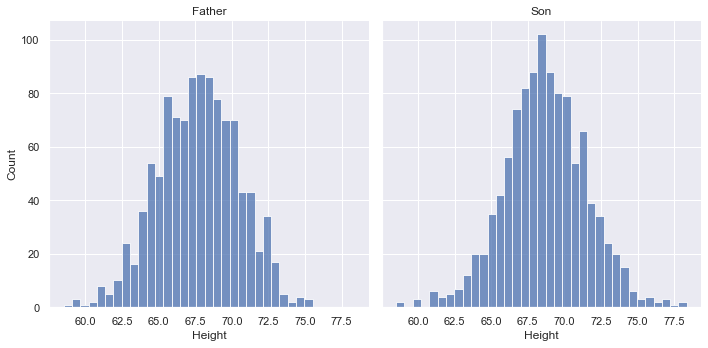

In [3]:
g = sns.displot(data=heights.melt(value_name="Height"),x="Height",col="variable")
g.set_titles(col_template='{col_name}')

Let's aggregate by mean and standard deviation:

In [4]:
heights["Son"].agg(["mean", "std"])

mean    68.684070
std      2.814702
Name: Son, dtype: float64

We could predict the height of someone by focussing only on "Son"-data (i.e. by NOT taking into account the predictor variable, "Father"):
- 68.68 inches
- and would likely be right within 2 std of that value (approx. +/- 5.6 inches from the mean).

This is our **"naïve" 🤓 model**: simply by looking at the stats of the data of the dependent variable, we can already make predictions with a relatively high likelihood of being right.

Since LinReg assumes a **linear relation between independent and dependent** vars (**assumption 1**), let's scatterplot our data:

<AxesSubplot:xlabel='Father', ylabel='Son'>

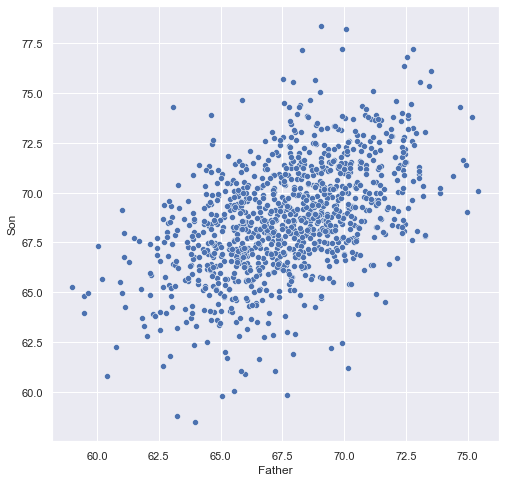

In [5]:
sns.scatterplot(
    data = heights,
    x = "Father",
    y = "Son"
)

So, qualitatively, the linearity assumption seems to be met. Let's use the data to quantify this linear relation and be able to make predictions. For this:
- first, let's create groups by which we then want to group by rounded height: 

In [6]:
heights["Group"] = heights["Father"].round().astype(int)
heights.head(2) 

,Father,Son,Group
0,65.04851,59.77827,65
1,63.25094,63.21404,63


- now, let's aggregate by counts, mean and standard deviation for each height-group:

In [7]:
son_stats = heights.groupby("Group").agg(
    {"Son": ["mean", "std", "count"]}
)

son_stats

Son                
            mean       std count
Group                           
59     64.669410  0.661594     3
60     64.673850  2.776654     4
61     65.930072  2.158895     8
62     65.593267  1.775472    15
63     66.514124  2.909974    36
64     66.701389  2.307661    60
65     67.223182  2.534444   101
66     67.656250  2.350964   139
67     68.139773  2.237706   134
68     69.092820  2.760430   157
69     69.443967  2.299950   142
70     69.768448  2.489530   115
71     70.540819  2.305104    77
72     70.677187  2.329985    50
73     72.049796  2.756266    28
74     70.364610  0.445680     3
75     71.720700  2.053495     6

- now plot average of y(x) ("average height of sons with a father of height x") for a specific x_i ("height x of father") 

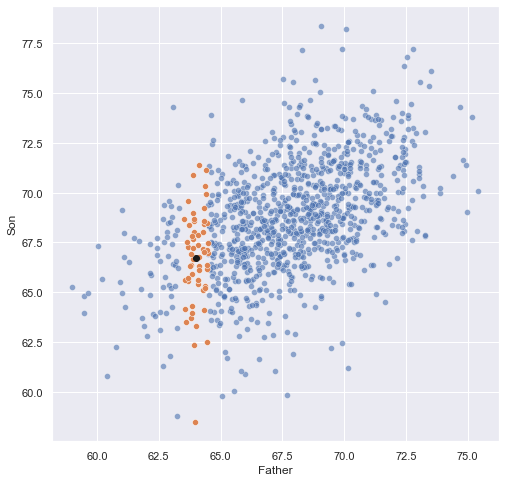

In [8]:
sns.scatterplot( data=heights.query("Group!=64"), x="Father", y="Son", alpha=0.6 )
sns.scatterplot( data=heights.query("Group==64"), x="Father", y="Son" )
plt.plot( son_stats.query("Group==64").Son["mean"], 'ok' )

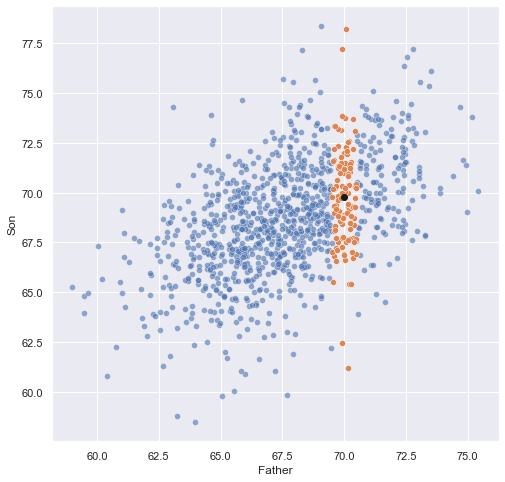

In [9]:
sns.scatterplot( data=heights.query("Group!=70"), x="Father", y="Son", alpha=0.6 )
sns.scatterplot( data=heights.query("Group==70"), x="Father", y="Son" )
plt.plot( son_stats.query("Group==70").Son["mean"], 'ok' )

- connect the black points:

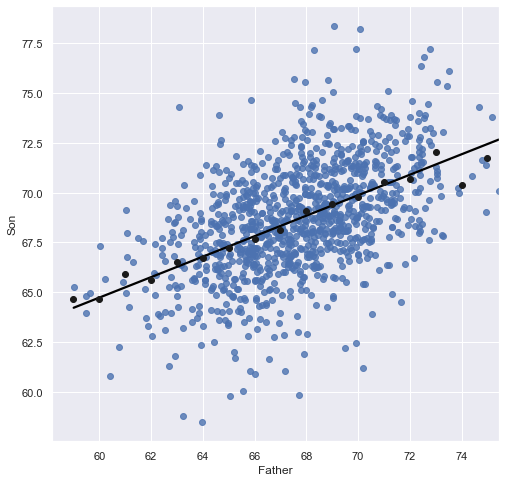

In [10]:
sns.regplot( data=heights, x="Father", y="Son",
                 ci=None, line_kws={"color": "black"})
plt.plot(son_stats.Son["mean"], 'ok')

We have obtained the **line of averages**!

Hence the term: "regression to mediocrity," (Francis Galton); we now summarize this regression effect more politely as "regression to the mean."

Importantly, if we **take into account the information of the independent variable** (as opposed to the naïve model approach) we can:
- make predictions by "point" and
- quantify variance of each prediction: 

In [11]:
son_stats = son_stats.reset_index()
son_stats 

Group        Son                
               mean       std count
0     59  64.669410  0.661594     3
1     60  64.673850  2.776654     4
2     61  65.930072  2.158895     8
3     62  65.593267  1.775472    15
4     63  66.514124  2.909974    36
5     64  66.701389  2.307661    60
6     65  67.223182  2.534444   101
7     66  67.656250  2.350964   139
8     67  68.139773  2.237706   134
9     68  69.092820  2.760430   157
10    69  69.443967  2.299950   142
11    70  69.768448  2.489530   115
12    71  70.540819  2.305104    77
13    72  70.677187  2.329985    50
14    73  72.049796  2.756266    28
15    74  70.364610  0.445680     3
16    75  71.720700  2.053495     6

In [12]:
seventy = son_stats[
    son_stats["Group"] == 70
]
seventy

Group        Son               
               mean      std count
11    70  69.768448  2.48953   115

In [13]:
sixty_four = son_stats[
    son_stats["Group"] == 64
]
sixty_four

Group        Son                
              mean       std count
5    64  66.701389  2.307661    60

Using our linear model, we are able to beat our baseline model in important ways:
- we can make "point" predictions (i.e. for each height group) and
- we have reduced variance of our predictions (approx. +/- 4.6 and/or +/-5 inches from the mean)!

**Hence, we see that the linear model (represented here as the "line of averages") performs better in making predictions and reducing the variance (see this point again below, when R^2 is discussed!).

### 2. using *the model equation 🤓*   

$$\hat y = w_0 $$

(This corresponds to the `DummyRegressor` in `sklearn`).

In [14]:
dummy = DummyRegressor()

In [15]:
children = pd.read_csv("mbrudd/data/africa.csv")
children.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   47 non-null     object
 1   Literacy  47 non-null     int64 
 2   IMR       47 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [16]:
naive_predictor = children["IMR"].mean()    # the number of infant deaths for every 1,000 live births (as a reference, in 2019, the infant 
# mortality rate in the United States was 5.6 deaths per 1,000 live births: https://www.google.com/search?q=definition+of+infant+mortality+rate&oq=definition+of+infant+mortality+rate&aqs=chrome.0.0i512l3j0i22i30l7.5373j1j7&sourceid=chrome&ie=UTF-8)

naive_predictor


58.1063829787234

In [17]:
X = children.drop(["IMR"], axis=1)
y = children["IMR"]

In [18]:
dummy.fit(X,y)

DummyRegressor()

In [19]:
dummy.predict(X)

array([58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298, 58.10638298, 58.10638298, 58.10638298,
       58.10638298, 58.10638298])

In [20]:
dummy.score(X,y)

0.0

**Note!**: we're using linear regression here to fit a line through our data points, not to build a machine learning model, so we're not train-test splitting.

## Train a Linear Regression 🏹 Model (using sklearn)

1. Fit a line to a series of points
2. Find the error of the line
3. Optimise the line's fit
4. Score your results

In [21]:
m = LinearRegression()

In [22]:
heights = heights.copy()
heights.columns

Index(['Father', 'Son', 'Group'], dtype='object')

In [23]:
heights.drop(["Group"], axis = 1, inplace=True)
heights.columns

Index(['Father', 'Son'], dtype='object')

In [24]:
X = heights[["Father"]]
y = heights["Son"]

In [25]:
m.fit(X,y)

LinearRegression()

In [26]:
m.coef_, m.intercept_

(array([0.51409304]), 33.886604354077924)

In [27]:
m.score(X,y)

0.25134010224913705

Score you get from `m.score()` for linear regression is $R$^2
* it tells you how much variance in your data is explained by your model — high R^2 is good, because then most most of the variance in your data is explained by your model. 
* it tells you how much better your model is than predicting average $y$ — if your R^2 is 0 then your model is no better than predicting an average value of $y$ 
* in our example, R^2 tells us that including "Father" as a predictor reduces the null model’s variability by about 25%
* it's similar to "accuracy" in that it can only take values between 0 and 1

### MSE (see above):

* It is very sensitve to outliers - each residual is squared, so..
* residuals greater than one have a disproportionate big effect on outliers... 
* residuals less than one have a disproportionate small effect on outliers... 

### Alternatives:

* MAE - average of the absolute residuals. (less sensitive to outliers than the MSE)
* RMSLE - root-mean squared log error (doesn't penalise over-estimates as much as underestimates)

## Pros and Cons

Pros
* Easy to explain to third parties 
* It's faster than LogReg (which is already quite fast!)
* It can take a vast number of features
* It can be applied to a vast set of problems (including datasets which do not have linear relations)

Cons
* Assumption of linearity can also be confusing: model would predict if temperatures -> infinity => bike rentals -> infinity (no treshold)

Other comments:
- note the difference between "epsilon" and residuals. The latter is the difference between "y" and "y_hat", while the epsilon can be understood as "noise" (which represents randomness and indicates that in reality you cannot perfectly describe the relation between "x" and "y" because there are other random effects on y not explained by the model)